In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [5]:
data=nc.Dataset('/scratch/group/ihesp/archive/Sunway_Runs/HR_PI_CTRL/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.AICE.002101-050112.nc')
#plotvar1 = data.variables['aice'][7:5760:12,0:344,600:1600]
#plotvar2 = data.variables['aice'][8:5760:12,0:344,600:1600]
#plotvar3 = data.variables['aice'][9:5760:12,248:344,600:1400]
plotvar3 = data.variables['aice'][8:5760:12,224:343,600:1400]
#plotvar4 = data.variables['aice'][10:5760:12,0:344,600:1600]

In [6]:
plotvar3.shape

(480, 119, 800)

In [7]:
480*12

5760

In [8]:
data.variables['aice'].shape

(5772, 2400, 3600)

In [9]:
#ave = (plotvar1 + plotvar2 + plotvar3 + plotvar4)/4
#ave[ave > 88] = np.nan

In [10]:
#plotvar3[plotvar3 > 88] = np.nan

In [11]:
#aveplot = np.nanmean(ave,axis=1)
#np.nanmean(plotvar,axis=0)

In [12]:
aveplot = np.nanmean(plotvar3,axis=1)

In [13]:
A = np.arange(350)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)

In [14]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
#nice_cmap=sns.diverging_palette(245, 10, n=15,as_cmap=True)
#lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,105,115,125,130]) 
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
#nice_levels = [0,10,20,30,40,50,60,70,80,90]
#norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

In [15]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'spacing'
  import sys
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


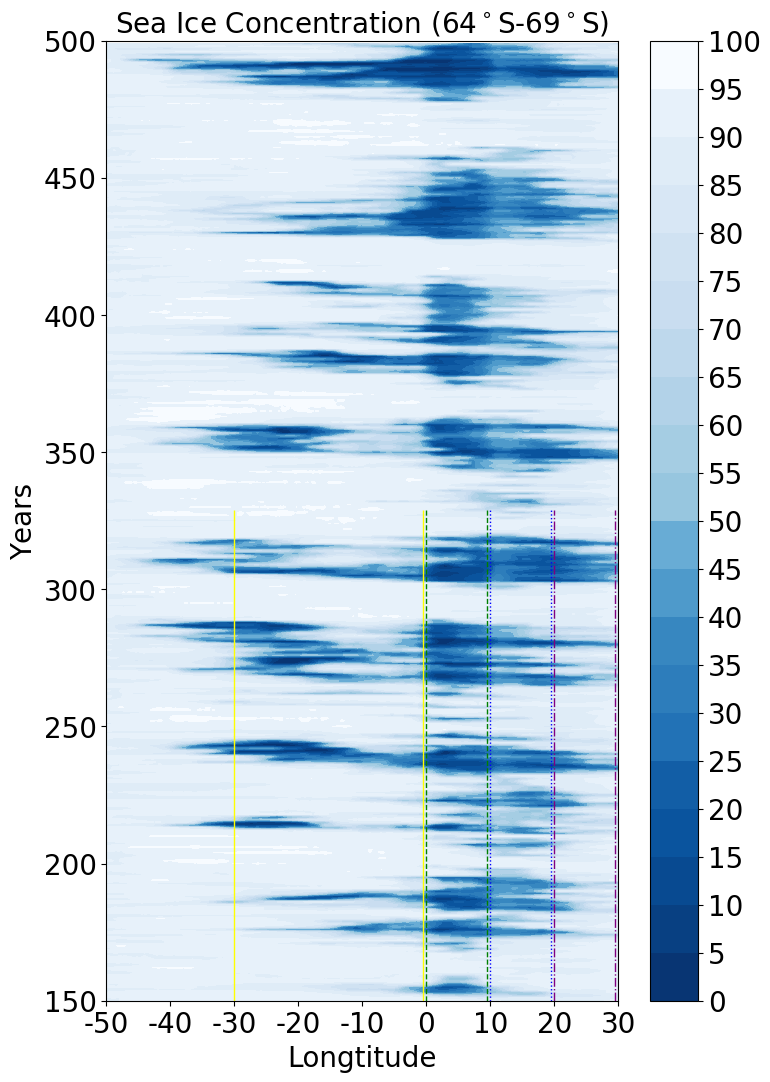

In [16]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, aveplot[129:479,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')
#im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")

plt.vlines(200, 0, 179, colors = "yellow",linestyles = "solid",linewidth=1)
plt.vlines(495, 0, 179, colors = "yellow",linestyles = "solid",linewidth=1)


plt.vlines(500, 0, 179, colors = "green",linestyles = "dashed",linewidth=1)
plt.vlines(595, 0, 179, colors = "green",linestyles = "dashed",linewidth=1)

plt.vlines(600, 0, 179, colors = "blue",linestyles = "dotted",linewidth=1)
plt.vlines(695, 0, 179, colors = "blue",linestyles = "dotted",linewidth=1)


plt.vlines(700, 0, 179, colors = "purple",linestyles = 'dashdot',linewidth=1)
plt.vlines(795, 0, 179, colors = "purple",linestyles = "dashdot",linewidth=1)
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(0,801,100), ['-50','-40','-30','-20','-10', '0', '10', '20','30'],**my_font)
#plt.yticks(range(0,181,10), ['150','160','170',\
                             #'180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Sea Ice Concentration (64$^\circ$S-69$^\circ$S)',**my_font)
plt.savefig("HHH3.png",bbox_inches='tight',dpi=fig.dpi)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'spacing'
  import sys


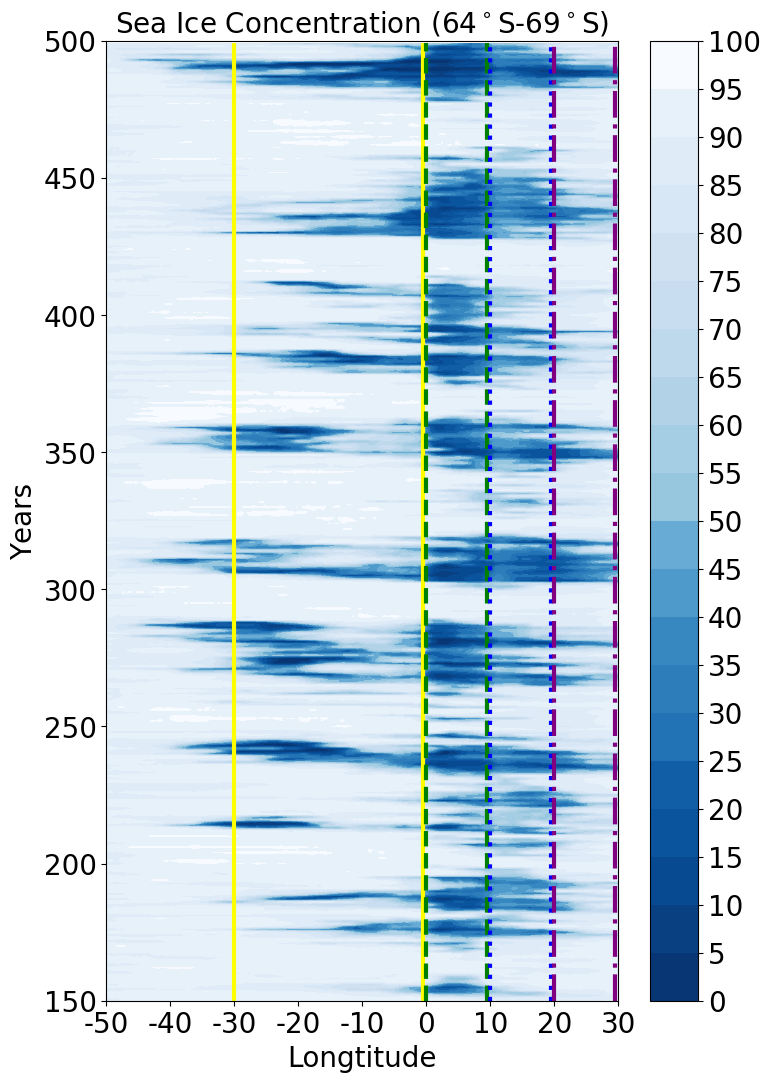

In [17]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, aveplot[129:479,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')
#im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")

plt.vlines(200, 0, 349, colors = "yellow",linestyles = "solid",linewidth=3)
plt.vlines(495, 0, 349, colors = "yellow",linestyles = "solid",linewidth=3)


plt.vlines(500, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(595, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)

plt.vlines(600, 0, 349, colors = "blue",linestyles = "dotted",linewidth=3)
plt.vlines(695, 0, 349, colors = "blue",linestyles = "dotted",linewidth=3)


plt.vlines(700, 0, 349, colors = "purple",linestyles = 'dashdot',linewidth=3)
plt.vlines(795, 0, 349, colors = "purple",linestyles = "dashdot",linewidth=3)
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(0,801,100), ['-50','-40','-30','-20','-10', '0', '10', '20','30'],**my_font)
#plt.yticks(range(0,251,50), ['250(1850)', '300(1900)','350(1950)', '400(2000)','450(2050)','500(2100)'],**my_font)
plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Sea Ice Concentration (64$^\circ$S-69$^\circ$S)',**my_font)
plt.savefig("HHH2.png",bbox_inches='tight',dpi=fig.dpi)

In [18]:
weddle = aveplot[129:479,200:500]
maudrise = aveplot[129:479,500:600]
astrid = aveplot[129:479,600:700]
upstream = aveplot[129:479,700:800]

In [19]:
weddlemean = weddle.mean(axis=1)
maudmean = maudrise.mean(axis=1)
astridmean = astrid.mean(axis=1)
upmean = upstream.mean(axis=1)

In [20]:
np.savetxt('weddlemeanice.out', weddlemean)
np.savetxt('maudmeanice.out', maudmean)
np.savetxt('astridmeanice.out', astridmean)
np.savetxt('upmeanice.out', upmean)

NameError: name 'uppxx' is not defined

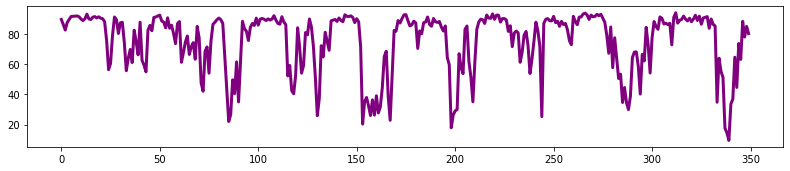

In [21]:
fig = plt.figure(figsize=(15,15))
#######################################
my_font = {'fontname':'Cambria', 'size':'20'}
fig.add_axes([0.15,0.835,0.70,0.13])
##########################################################
plt.plot(upmean,'purple',linewidth=3)
plt.vlines(uppxx, 0, 100, colors = "grey")
plt.hlines(70, 0, 350, colors = "black",linestyles = "dashed")
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.ylabel('up-stream',color='purple',**my_font)
plt.title('Sea ice contration (%)',**my_font)
####################################################
con_ax_top = fig.add_axes([0.15,0.705,0.70,0.13])
plt.plot(astridmean,'blue',linewidth=3)
plt.vlines(arpxx, 0, 100, colors = "lightgrey")
plt.hlines(70, 0, 350, colors = "black",linestyles = "dashed")
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.ylabel('ARP',color='blue',**my_font)

#############################
fig.add_axes([0.15,0.575,0.70,0.13])
plt.plot(maudmean,'green',linewidth=3)
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.ylabel('MRP',color='green',**my_font)
#plt.vlines(noxx, 0, 100, colors = "lightgrey")
plt.hlines(70, 0, 350, colors = "black",linestyles = "dashed")
plt.vlines(mrpxx, 0, 100, colors = "grey")
#plt.vlines(wspxx, 0, 100, colors = "r")
#####################################################
fig.add_axes([0.15,0.445,0.70,0.13])
plt.plot(weddlemean,'y',linewidth=3)
plt.ylabel('WSP',color='y',**my_font)
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.xticks(range(0,351,50), ['150', '200', '250','300','350','400','450','500'],**my_font)
#plt.vlines(noxx, 0, 100, colors = "lightgrey")
#plt.vlines(mrpxx, 0, 100, colors = "grey")
plt.vlines(wspxx, 0, 100, colors = "r")
plt.hlines(70, 0, 350, colors = "black",linestyles = "dashed")
plt.xlabel('Years',**my_font)
plt.savefig("icea.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
fig = plt.figure(figsize=(15,15))
#######################################
my_font = {'fontname':'Cambria', 'size':'20'}
fig.add_axes([0.15,0.835,0.70,0.13])
##########################################################
data = plt.plot(weddlemean,'purple',linewidth=3)
plt.yticks(range(0,100,20), ['','20', '40','60', '80','100'],**my_font)
plt.ylabel('up-stream',color='purple',**my_font)
plt.title('Sea ice contration (%)',**my_font)
h50 = plt.hlines(50, 0, 350, colors = "g",linestyles = "dashed")
####################################################
plt.vlines(xx, 0, 100, colors = "r")

In [17]:
wspxx = np.where(weddlemean<70)
mrpxx = np.where(maudmean<70)
noxx = np.where(maudmean>70)
arpxx = np.where(astridmean<70)
uppxx = np.where(upmean<70)

In [18]:
np.savetxt('wspxx.out', wspxx)
np.savetxt('mrpxx.out', mrpxx)
np.savetxt('noxx.out', noxx)

np.savetxt('arpxx.out', arpxx)
np.savetxt('uppxx.out', uppxx)

In [19]:
uppxx

(array([ 24,  25,  33,  34,  35,  36,  39,  41,  42,  43,  61,  62,  65,
         68,  71,  72,  73,  75,  83,  84,  85,  86,  87,  88,  89,  90,
         91, 115, 116, 117, 118, 119, 122, 123, 129, 130, 131, 133, 136,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 196, 197, 198, 199, 200, 201, 202, 203, 204, 207,
        208, 209, 210, 233, 234, 238, 239, 244, 278, 280, 282, 283, 284,
        285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 299,
        333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 345]),)

In [2]:
import waipy

In [4]:
weddlemean = np.loadtxt("weddlemeanice.out")

In [5]:
#data_norm = waipy.normalize(maudmean)#(maudmean)
data_norm = waipy.normalize(weddlemean)

In [6]:
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))

Lag-1 autocorrelation = 0.87


In [17]:
label='Weddell Sea Ice Concentration Normalized Value'


In [18]:
waipy.cwt?

In [19]:
#result = waipy.cwt(data_norm, 1, pad = 1, dj = 0.25, s0 = 2, j1 = 3/0.25, lag1 = alpha, param = 6, mother='Morlet',name='ww')

In [20]:
result = waipy.cwt(data_norm, 1, pad = 1, dj = 0.25, s0 = 2, j1 = 7/0.25, lag1 = alpha, param = 6, mother='Morlet',name='x')

Nr of Scales: 29
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546, 128.0, 152.2185107203483, 181.01933598375618, 215.2694823049509, 256.0, 304.4370214406966]


In [21]:
time = np.arange(0, 350) * 1 + 150

In [22]:
my_font = {'fontname':'Cambria', 'size':'15','weight' : 'bold'}

In [23]:
#waipy.wavelet_plot?

In [24]:
import matplotlib
import matplotlib.pyplot as plt

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


NameError: name 'fig' is not defined

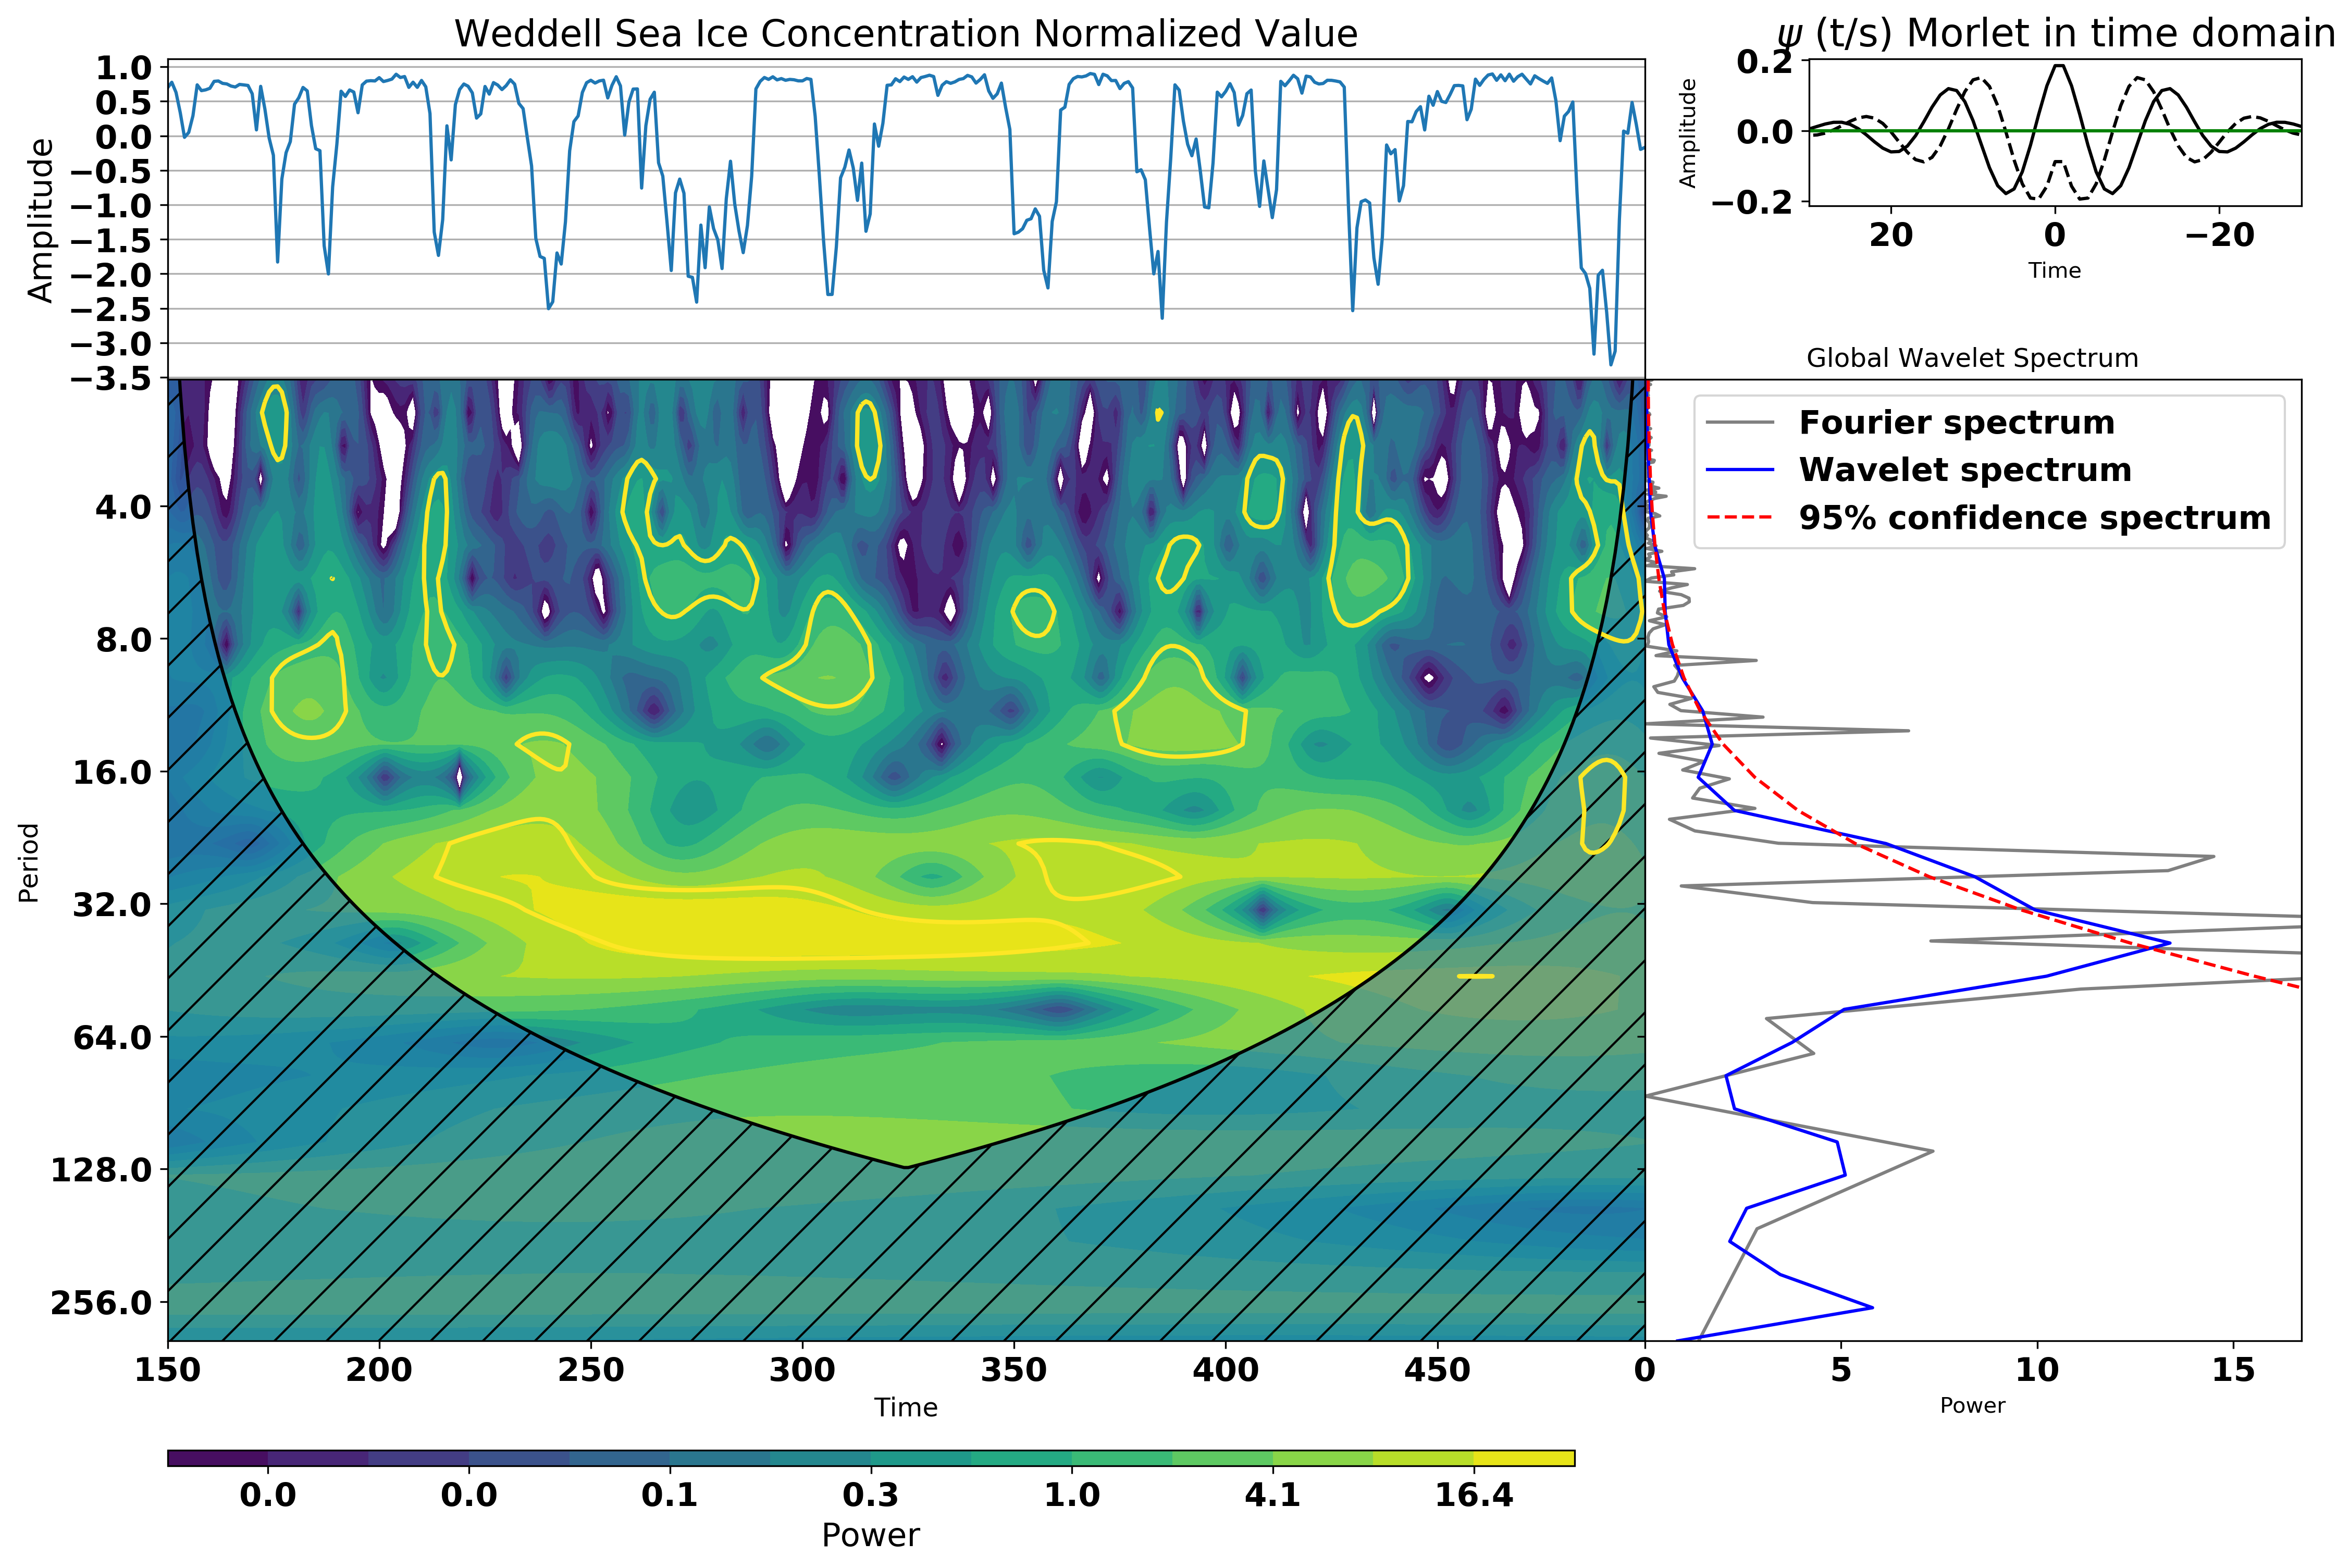

In [25]:

waipy.wavelet_plot(label, time, data_norm, 0.001, result);

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.savefig("i2.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
waipy.wavelet_plot?



In [ ]:
waipy.cwt?